Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission.
Each group of students (mostly pairs, with some approved exceptions) should submit a Zip file, whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.zip.
The ZIP file should contain:
1. Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.ipynb.
2. Python File (map-reduce part, .py file) whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.py.

In [6]:
# install pyspark library (via pip install)
# There is no need to set a local spark server.

!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyspark-3.4.1.tar.gz (310.8 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=69769827df0774cd149f8f139a0635e69d37ce952b92bf4c6f43ca1cee6905a7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [7]:
# run this command to make sure the versions of pyspark and your python match:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

for each of the tasks bellow, make sure you add a print command at the end of the cell, to show the results (df.show(1))

# Getting started:

start a spark session

In [8]:
from pyspark.sql import SparkSession
name = '' #give a name to your app
spark = SparkSession.builder.appName('{name}'.format(name=name)).getOrCreate()

load the wine dataset:

In [9]:
from sklearn.datasets import load_wine

wine = load_wine()
data = wine.data
columns = list(wine.feature_names)

create spark dataframe to contain the data and the columns names as it's schema





In [10]:
df = spark.createDataFrame(data.tolist(), columns)
df.show()

+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+
|alcohol|malic_acid| ash|alcalinity_of_ash|magnesium|total_phenols|flavanoids|nonflavanoid_phenols|proanthocyanins|color_intensity| hue|od280/od315_of_diluted_wines|proline|
+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+
|  14.23|      1.71|2.43|             15.6|    127.0|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92| 1065.0|
|   13.2|      1.78|2.14|             11.2|    100.0|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4| 1050.0|
|  13.16|      2.36|2.67|             18.6|    101.0|          2.8|      3.24|                 0.3|           2.81|           5.68

preform 3 initial data exploration tasks that will help you understand your data better

In [11]:
# Summary statistics
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+------------------+-------------------+----------------------------+------------------+
|summary|           alcohol|        malic_acid|               ash| alcalinity_of_ash|        magnesium|     total_phenols|        flavanoids|nonflavanoid_phenols|   proanthocyanins|   color_intensity|                hue|od280/od315_of_diluted_wines|           proline|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+------------------+-------------------+----------------------------+------------------+
|  count|               178|               178|               178|               178|              178|               178|               178|                 178|               178|            

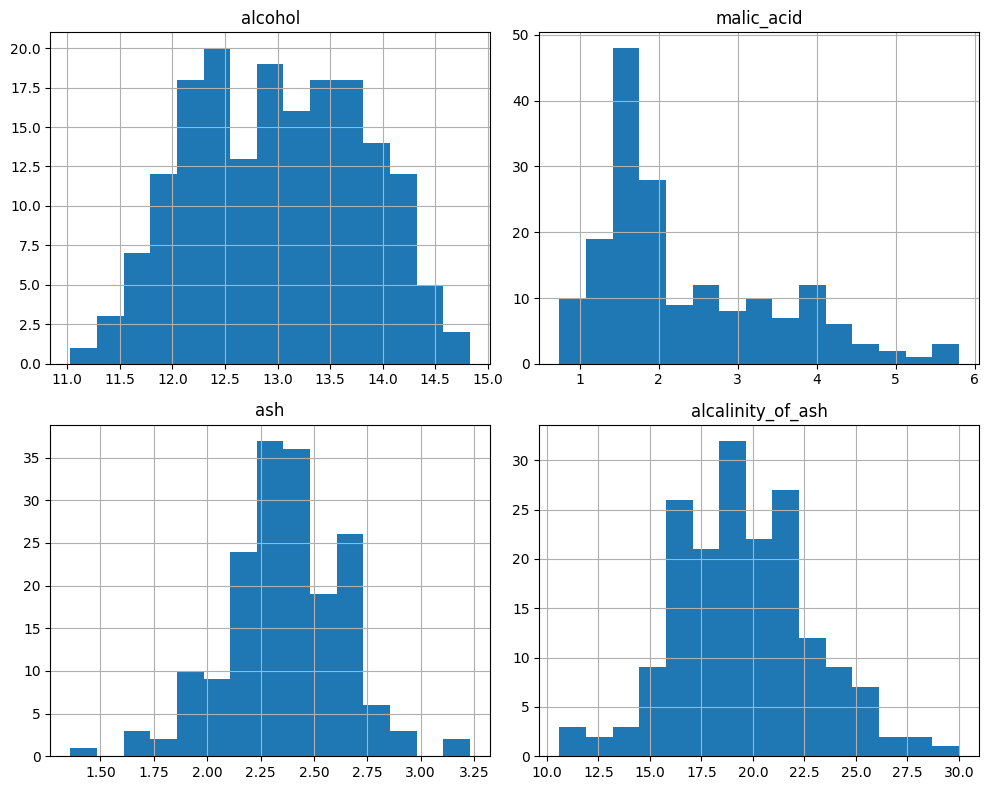

In [12]:
# Visualize some distributions using histograms
import matplotlib.pyplot as plt

df.select('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash').toPandas().hist(bins=15, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [13]:
#correlation

import seaborn as sns

corr_matrix = df.toPandas().corr()
display(corr_matrix)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


# Data preparation tasks:

preform the following data cleaning task:

    1. rename the column "Alcohol" to "ABV"


In [14]:
df = df.withColumnRenamed("Alcohol", "ABV")

    2. create a new column that will we be the standardization of column "magnesium". call it "magnesium_stand"

In [15]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["magnesium"], outputCol="magnesium_features")
scaler = StandardScaler(inputCol="magnesium_features", outputCol="magnesium_stand")
pipeline = Pipeline(stages=[assembler, scaler])
updated_df = pipeline.fit(df).transform(df).drop("magnesium_features")
updated_df.show()



+-----+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+
|  ABV|malic_acid| ash|alcalinity_of_ash|magnesium|total_phenols|flavanoids|nonflavanoid_phenols|proanthocyanins|color_intensity| hue|od280/od315_of_diluted_wines|proline|     magnesium_stand|
+-----+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+
|14.23|      1.71|2.43|             15.6|    127.0|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92| 1065.0| [8.892010963218745]|
| 13.2|      1.78|2.14|             11.2|    100.0|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4| 1050.0|  [7.00158343560531]|
|13.16|      2.36|2.67|            

    3. create a new column that will be valued 1 (and 0 otherwise) if the alcohol rate exceeds 14 (including) and color_intensity exceeds 6. call it "col_intense".

In [16]:
from pyspark.sql.functions import col, when

updated_df = updated_df.withColumn("col_intense", when((col("ABV") >= 14) & (col("color_intensity") > 6), 1).otherwise(0))

updated_df.show()

+-----+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+-----------+
|  ABV|malic_acid| ash|alcalinity_of_ash|magnesium|total_phenols|flavanoids|nonflavanoid_phenols|proanthocyanins|color_intensity| hue|od280/od315_of_diluted_wines|proline|     magnesium_stand|col_intense|
+-----+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+-----------+
|14.23|      1.71|2.43|             15.6|    127.0|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92| 1065.0| [8.892010963218745]|          0|
| 13.2|      1.78|2.14|             11.2|    100.0|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4| 1050.0|  [7.0015

We will load the labels of the data above:

In [17]:
target = wine.target
column = ['Class']



create spark dataframe to contain the data and the columns of the target

In [18]:
from pyspark.sql.types import StructType, StructField, IntegerType

target_vals = target.tolist()
schema = StructType([StructField("class", IntegerType(), nullable=False)])
df_target = spark.createDataFrame(list(zip(target_vals)), schema)

df_target.show()

+-----+
|class|
+-----+
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
+-----+
only showing top 20 rows



merge the two datasets to one dataset

In [19]:
combined_df = df_target.join(updated_df)
combined_df.show()

+-----+-----+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+-----------+
|class|  ABV|malic_acid| ash|alcalinity_of_ash|magnesium|total_phenols|flavanoids|nonflavanoid_phenols|proanthocyanins|color_intensity| hue|od280/od315_of_diluted_wines|proline|     magnesium_stand|col_intense|
+-----+-----+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+-----------+
|    0|14.23|      1.71|2.43|             15.6|    127.0|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92| 1065.0| [8.892010963218745]|          0|
|    0| 13.2|      1.78|2.14|             11.2|    100.0|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                

# Explore your data and labels:

preform exploration tasks to find the answer to each question below:

1. how many samples do you have for each class

In [20]:
from pyspark.sql.functions import count

class_cnts = combined_df.groupBy("Class").agg(count("*").alias("Count"))
class_cnts.show()

+-----+-----+
|Class|Count|
+-----+-----+
|    1|12638|
|    0|10502|
|    2| 8544|
+-----+-----+



2. which class has the highest alcohol value? which class has highest alcohol values on average?  

In [21]:
from pyspark.sql.functions import max
from pyspark.sql.functions import avg


# Highest alcohol value
Max_alcohol = combined_df.groupBy("Class").agg(max("ABV").alias("Max_Alcohol")).orderBy("Max_Alcohol", ascending=False).limit(1)
Max_alcohol.show()

# Highest alcohol values on average
Max_alcohol_avg = combined_df.groupBy("Class").agg(avg("ABV").alias("Avg_Alcohol")).orderBy("Avg_Alcohol", ascending=False).limit(1)
Max_alcohol_avg.show()


+-----+-----------+
|Class|Max_Alcohol|
+-----+-----------+
|    1|      14.83|
+-----+-----------+

+-----+------------------+
|Class|       Avg_Alcohol|
+-----+------------------+
|    0|13.000617977528158|
+-----+------------------+



3. which column has the highset correlation with Class column?

In [22]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

num_clmns = [col for col in combined_df.columns if col != "Class"]
assembler = VectorAssembler(inputCols=num_clmns, outputCol="features")
f_vector = assembler.transform(combined_df)
corr_matrix = Correlation.corr(f_vector, "features").head()
corr_vals = corr_matrix[0].toArray()[-1]
highest_corr_i = abs(corr_vals).argmax()
highest_corr_clmn = num_clmns[highest_corr_i]

print("The column with the highest correlation with Class column is:", highest_corr_clmn)

The column with the highest correlation with Class column is: col_intense


# Train an ML model to predict the class (Bonus)

1. create a column for the featers
2. split your data to train and test (70%,30%)
3. train Random Forest model to predict the column "Class"
4. print your test results (using metric accuracy)